1) DFS

In [7]:
import queue
import threading

class Graph:
    def __init__(self, V):
        self.V = V
        self.adj = [[] for i in range(V)]

    def addEdge(self, u, v):
        self.adj[u].append(v)
        self.adj[v].append(u)

    def BFS(self, start):
        q = queue.Queue()
        visited = [False] * self.V
        visited[start] = True
        q.put(start)
        while not q.empty():
            u = q.get()
            print(u, end=" ")
            for v in self.adj[u]:
                if not visited[v]:
                    visited[v] = True
                    q.put(v)

def main():
    g = Graph(7)
    g.addEdge(0, 1)
    g.addEdge(0, 2)
    g.addEdge(1, 3)
    g.addEdge(1, 4)
    g.addEdge(2, 5)
    g.addEdge(2, 6)
    print("Breadth First Search: ", end="")
    g.BFS(0)

if __name__ == "__main__":
    main()

Breadth First Search: 0 1 2 3 4 5 6 

2) Bubble sort

In [6]:
import numpy as np
import multiprocessing as mp

def bubble(a, n):
    for i in range(n):
        first = i % 2
        with mp.Pool(processes=mp.cpu_count()) as pool:
            pool.starmap(swap, [(a[j], a[j+1]) for j in range(first, n-1, 2) if a[j] > a[j+1]])
            
def swap(a, b):
    a, b = b, a

if __name__ == '__main__':
    n = int(input("\n enter total no of elements=>"))
    a = np.empty(n, dtype=int)
    print("\n enter elements=>")
    for i in range(n):
        a[i] = int(input())
    bubble(a, n)
    print("\n sorted array is=>")
    print()
    for i in range(n):
        print(a[i])


 enter total no of elements=>2

 enter elements=>
89
45

 sorted array is=>

89
45


3)CUDA for vector addition

In [8]:
!apt-get install cuda

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  accountsservice acl apg apport apport-symptoms aptdaemon aptdaemon-data
  aspell aspell-en at-spi2-core avahi-daemon avahi-utils bind9-host bind9-libs
  bluez bolt bubblewrap cheese-common colord colord-data cracklib-runtime crda
  cuda-12-1 cuda-cccl-12-1 cuda-command-line-tools-12-1 cuda-compiler-12-1
  cuda-cudart-12-1 cuda-cudart-dev-12-1 cuda-cuobjdump-12-1 cuda-cupti-12-1
  cuda-cupti-dev-12-1 cuda-cuxxfilt-12-1 cuda-demo-suite-12-1
  cuda-documentation-12-1 cuda-driver-dev-12-1 cuda-drivers cuda-drivers-530
  cuda-gdb-12-1 cuda-libraries-12-1 cuda-libraries-dev-12-1 cuda-nsight-12-1
  cuda-nsight-compute-12-1 cuda-nsight-systems-12-1 cuda-nvcc-12-1
  cuda-nvdisasm-12-1 cuda-nvml-dev-12-1 cuda-nvprof-12-1 cuda-nvprune-12-1
  cuda-nvrtc-12-1 cuda-nvrtc-dev-12-1 cuda-nvtx-12-1 cuda-nvvp-12-1
  cuda-opencl-12-1 cuda-opencl-dev-12-1 cu

In [9]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Mon_Apr__3_17:16:06_PDT_2023
Cuda compilation tools, release 12.1, V12.1.105
Build cuda_12.1.r12.1/compiler.32688072_0


In [ ]:

import numpy as np
from numba import cuda
# Define the kernel function to add two vectors
@cuda.jit
def vector_add(a, b, c):
# Get the thread ID
  tid = cuda.threadIdx.x + cuda.blockDim.x * cuda.blockIdx.x
# Calculate the stride length (number of threads)
  stride = cuda.gridDim.x * cuda.blockDim.x
# Loop over the elements of the vectors and add them
  for i in range(tid, a.size, stride):
    c[i] = a[i] + b[i]
# Define the main function to add two vectors
def main():
# Get the size of the vectors from the user
  N = int(input("Enter the size of the vector: "))
# Initialize the vectors with user input
  a = np.zeros(N, dtype=np.float32)
  b = np.zeros(N, dtype=np.float32)
  c = np.zeros(N, dtype=np.float32)
  print("Enter the elements of the first vector: ")
  for i in range(N):
    a[i] = float(input())
    print("Enter the elements of the second vector: ")
  for i in range(N):
    b[i] = float(input())
# Allocate the memory on the device (GPU)
  d_a = cuda.to_device(a)
  d_b = cuda.to_device(b)
  d_c = cuda.to_device(c)
# Define the number of threads per block and the number of blocks per grid
  N = 1000000
  threads_per_block = 128
  blocks_per_grid = (N + (threads_per_block - 1)) // threads_per_block
# Call the kernel function on the device (GPU)
  vector_add[blocks_per_grid, threads_per_block](d_a, d_b, d_c)
# Copy the result back to the host (CPU)
  d_c.copy_to_host(c)
# Print the result
  print("Result: ", c)
# Call the main function to add two vectors
if __name__ == "__main__":
  main()
     

4) DFS


In [ ]:
import queue
import stack
import threading

class Graph:
    def __init__(self, V):
        self.V = V
        self.adj = [[] for i in range(V)]

    def addEdge(self, u, v):
        self.adj[u].append(v)
        self.adj[v].append(u)

    def DFS(self, start):
        s = stack.Stack()

        visited = [False] * self.V
        visited[start] = True
        s.push(start)
        while not s.empty():

            u = s.top()
            print(u, end=" ")
            s.pop()

            for v in self.adj[u]:
                if not visited[v]:
                    visited[v] = True
                    s.push(v)

if __name__ == "__main__":
    g = Graph(7)
    g.addEdge(0, 1)
    g.addEdge(0, 2)
    g.addEdge(1, 3)
    g.addEdge(1, 4)
    g.addEdge(2, 5)
    g.addEdge(2, 6)
    print("Depth First Search: ", end="")
    g.DFS(0)

DL_ASS_1_Boston

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.datasets import boston_housing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
# Load the Boston Housing dataset
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

57026/57026 [==============================] - 0s 0us/step


In [6]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [7]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 2s 32ms/step - loss: 577.5706 - val_loss: 627.9108
Epoch 2/100
11/11 [==============================] - 0s 9ms/step - loss: 542.3389 - val_loss: 590.4828
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 505.8958 - val_loss: 546.9375
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 459.0962 - val_loss: 488.0997
Epoch 5/100
11/11 [==============================] - 0s 10ms/step - loss: 396.5844 - val_loss: 406.7650
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 312.8181 - val_loss: 309.1953
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 221.3769 - val_loss: 210.5400
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 141.9821 - val_loss: 133.1658
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 89.0937 - val_loss: 89.0149
Epoch 10/100
11/11 [==============================] - 0s 6ms/step - loss:

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

4/4 [==============================] - 0s 4ms/step
Mean Squared Error: 24.238692744465585


Fashion_Dataset_Assignment_3

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

     


In [10]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
model = keras.Sequential([ keras.layers.Flatten(input_shape=(28, 28)), keras.layers.Dense (128, activation='relu'), keras.layers.Dense (10, activation='softmax') ])

     

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
     

In [15]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4997 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3721 - accuracy: 0.8662
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3363 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3117 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2979 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2815 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2682 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2585 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2475 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3348 - accuracy: 0.8874
Test accuracy: 0.8873999714851379


In [28]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


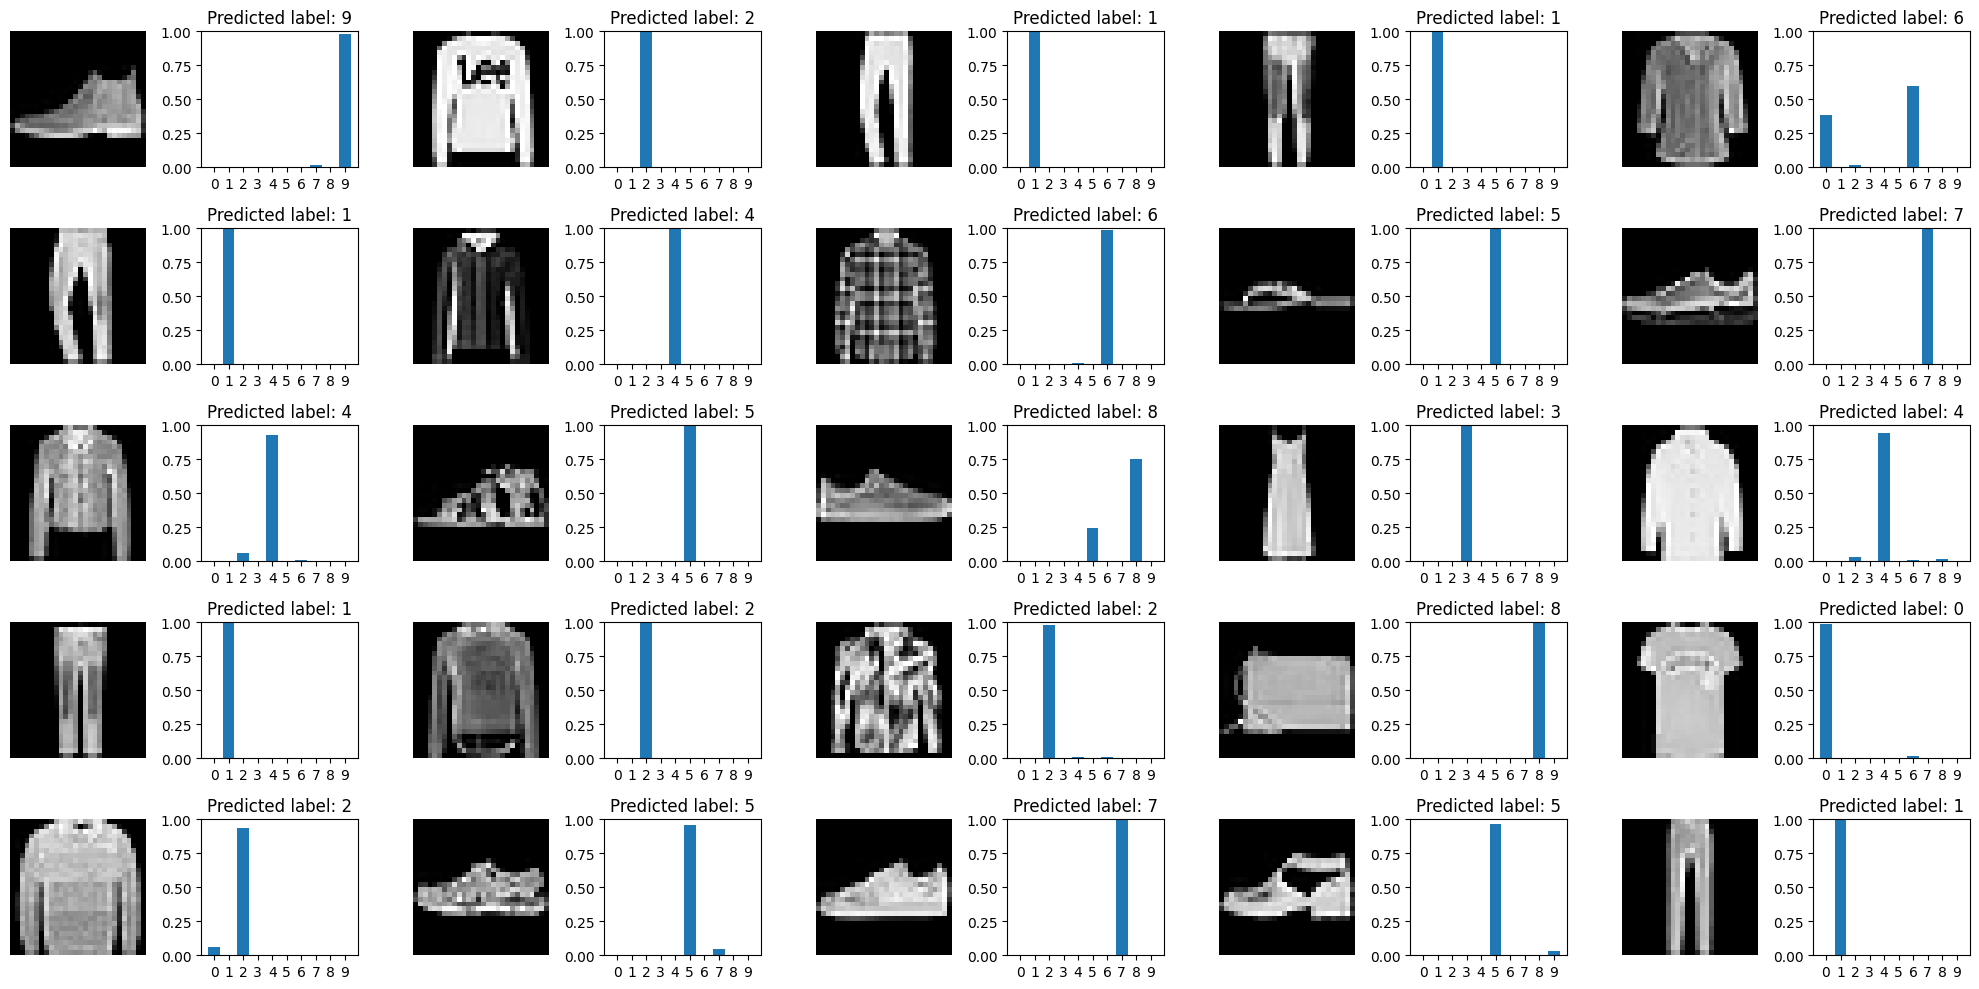

In [29]:

num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1) 
  plt.imshow(test_images[i], cmap='gray')
  plt.axis('off')
  plt.subplot(num_rows, 2 * num_cols, 2* i + 2)
  plt.bar(range(10), predictions[i])
  plt.xticks(range(10)) 
  plt.ylim([0, 1])
  plt.tight_layout()
  plt.title(f"Predicted label: {predicted_labels[i]}")
plt.show()

IMDB_ASSIGNMENT_2

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

In [31]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)
print(f'train dataset size: {len(x_train)}')
print(f'test dataset size: {len(x_test)}')

17464789/17464789 [==============================] - 0s 0us/step
train dataset size: 25000
test dataset size: 25000


In [32]:
max_len =250
x_train=pad_sequences(x_train,maxlen=max_len)
x_test=pad_sequences(x_test,maxlen=max_len)
print(f'train size: {x_train.shape}')
print(f'test size: {x_test.shape}')
     

train size: (25000, 250)
test size: (25000, 250)


In [33]:
model=Sequential()
model.add(Embedding(input_dim=10000,output_dim=128,input_length=max_len))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 128)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 250, 128)         98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,420,097
Trainable params: 1,420,097
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
     

In [35]:
history = model.fit(x_train,y_train,epochs=3,batch_size=150,validation_split=0.2)
     

Epoch 1/3
134/134 [==============================] - 305s 2s/step - loss: 0.4365 - accuracy: 0.7947 - val_loss: 0.3243 - val_accuracy: 0.8736
Epoch 2/3
134/134 [==============================] - 284s 2s/step - loss: 0.2323 - accuracy: 0.9140 - val_loss: 0.3151 - val_accuracy: 0.8786
Epoch 3/3
134/134 [==============================] - 284s 2s/step - loss: 0.1625 - accuracy: 0.9435 - val_loss: 0.3390 - val_accuracy: 0.8662


In [36]:
loss,acc=model.evaluate(x_test,y_test,batch_size=64)
print(f"test Accuracy: {acc:4f},test loss: {loss:4f}")
     

391/391 [==============================] - 107s 273ms/step - loss: 0.3549 - accuracy: 0.8602
test Accuracy: 0.860160,test loss: 0.354910


Max and Avg


In [ ]:
import sys
import numpy as np
import multiprocessing as mp

def max_reduction(arr):
    max_value = -sys.maxsize
    for i in arr:
        if i > max_value:
            max_value = i
    print("Maximum value:", max_value)

def average_reduction(arr):
    total_sum = 0
    for i in arr:
        total_sum += i
    print("Average:", total_sum / (len(arr) - 1))

if __name__ == '__main__':
    n = int(input("\nEnter total number of elements: "))
    arr = []
    print("\nEnter elements:")
    for i in range(n):
        arr.append(int(input()))
    max_reduction(arr)
    average_reduction(arr)


Merge Sort

In [ ]:
def merge(array, low, mid, high):
    temp = [0] * 30
    i = low
    j = low
    m = mid + 1
    while j <= mid and m <= high:
        if array[j] <= array[m]:
            temp[i] = array[j]
            j += 1
        else:
            temp[i] = array[m]
            m += 1
        i += 1
    if j > mid:
        while m <= high:
            temp[i] = array[m]
            i += 1
            m += 1
    else:
        while j <= mid:
            temp[i] = array[j]
            i += 1
            j += 1
    for k in range(low, high + 1):
        array[k] = temp[k]


def mergesort(array, low, high):
    if low < high:
        mid = (low + high) // 2
        mergesort(array, low, mid)
        mergesort(array, mid + 1, high)
        merge(array, low, mid, high)


if __name__ == '__main__':
    array = []
    size = int(input("Enter total number of elements: "))
    print("Enter", size, "elements:")
    for _ in range(size):
        array.append(int(input()))
    mergesort(array, 0, size - 1)
    print("Sorted Elements as follows:")
    for element in array:
        print(element, end=" ")
    print()


Min and Sum

In [ ]:
import sys
import numpy as np
import multiprocessing as mp

def max_reduction(arr):
    max_value = -sys.maxsize
    for i in arr:
        if i > max_value:
            max_value = i
    print("Maximum value:", max_value)

def sum_reduction(arr):
    total_sum = 0
    for i in arr:
        total_sum += i
    print("Sum:", total_sum)

if __name__ == '__main__':
    n = int(input("\nEnter total number of elements: "))
    arr = []
    print("\nEnter elements:")
    for i in range(n):
        arr.append(int(input()))
    max_reduction(arr)
    sum_reduction(arr)
